# Проектная работа по модулю “Математика и статистика в Python”

### 1. Загрузить файл hr.csv.


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('./HR.csv') 

Изучим структуру данных, из каких колонок состоит датасет, есть ли null-подобные записи и узнаем какие присутствуют типы данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


null-подобных объектов нет, в таблице есть числовые и строковые значения, посмотрим несколько записей

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Так же, я хочу знать, из каких уникальных значений состоят строковые колонки

In [5]:
for col in df.select_dtypes('object').columns.values:
    print(f'col: {col} =>', ', '.join(df[col].unique()))

col: sales => sales, accounting, hr, technical, support, management, IT, product_mng, marketing, RandD
col: salary => low, medium, high


### 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


Второй ряд у моды появился в связи с тем, что у колонке `average_montly_hours` есть два одинаковых самых высоких значений

### 3. Рассчитать и визуализировать корреляционную матрицу для переменных.

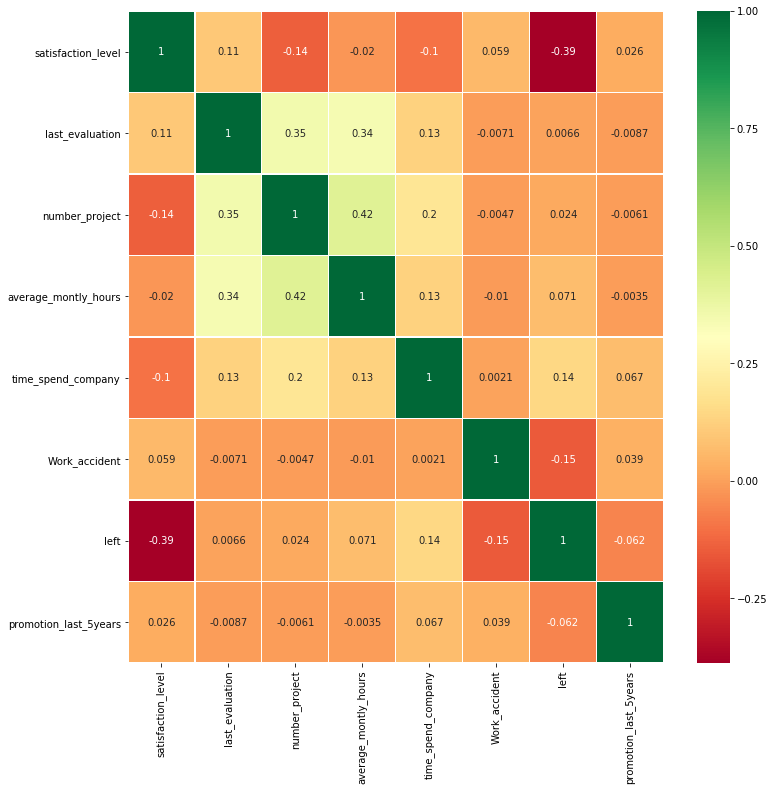

In [8]:
plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap='RdYlGn')
plt.show()

### 4. Визуализировать несколько взаимосвязей между переменными.

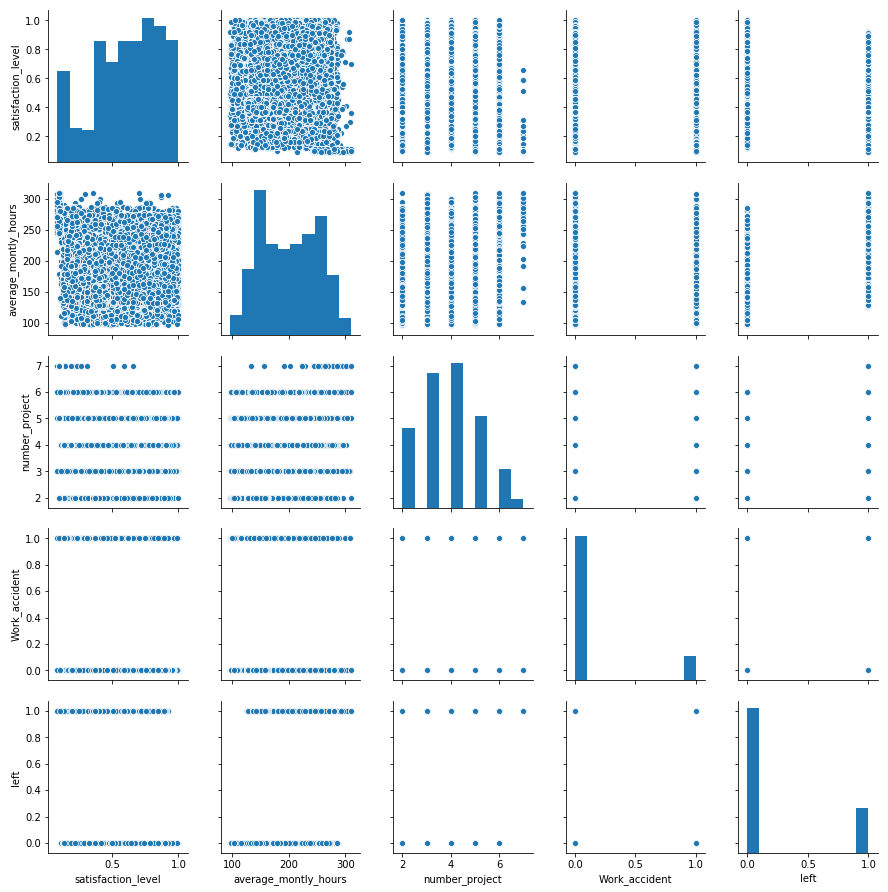

In [9]:
sns.pairplot(df[['satisfaction_level', 'average_montly_hours', 'number_project', 'Work_accident', 'left']])
plt.show()

Визуализация полей 'satisfaction_level', 'average_montly_hours', 'number_project', 'Work_accident', 'left' показала, что 'Work_accident' и 'left' являются булевыми признаками, а 'number_project' дискретная величина из всего 6 значений (от 2 до 7)

### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

#### В зависимости от разного уровня зарплат люди тратят разное количество часов на работе

In [10]:
stats.ttest_ind(
    df[df['salary'] == 'high']['average_montly_hours'].dropna(),
    df[df['salary'] == 'low']['average_montly_hours'].dropna()
)

Ttest_indResult(statistic=-0.7288680398062308, pvalue=0.4661023478267259)

Судя по тому, что pvalue выше критически допустимой нормы, мы принимаем нулевую гипотезу. Это означает, что уровень зарплаты не сильно влияет на количество часов, проведённых на работе.

#### IT'шники получают большее удовлетворение от работы, чем не IT'шники

In [11]:
# UPD
stats.ttest_1samp(
    df[df['sales'] == 'IT']['satisfaction_level'],
    df[df['sales'] != 'IT']['satisfaction_level'].mean()
)

Ttest_1sampResult(statistic=0.8103459513322989, pvalue=0.41789863518186854)

Так как мы имеем слишком высокое pvalue, то мы принимаем нулевую гипотезу. Это значит, что наша гипотеза не верна и айти отдел в среднем имеет такое же удовлетворение от работы, как остальные.

### 6. Рассчитать сколько работников работает в каждом департаменте.

Предварительно сделаю проверку на то, не покинул ли сотрудник компанию, чтобы более точно попасть в условие задания

In [12]:
count_by_sales_df = df[df['left'] == 0].groupby('sales').agg(count=('sales', 'count')).reset_index()

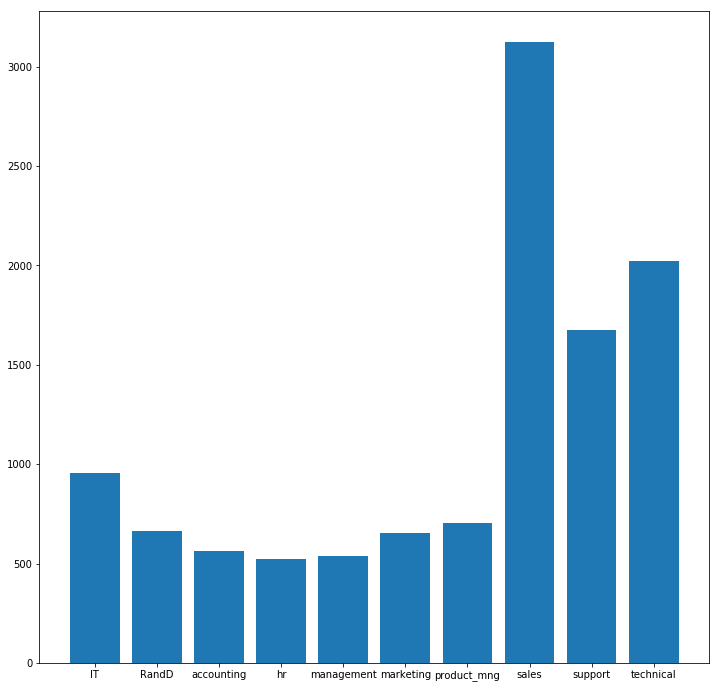

In [13]:
plt.subplots(figsize=(12, 12))

plt.bar(
    count_by_sales_df['sales'],
    count_by_sales_df['count']
)

plt.show()

### 7. Показать распределение сотрудников по зарплатам.

In [14]:
count_by_salary_df = df.groupby('salary').agg(count=('salary', 'count')).reset_index()
count_by_salary_df

,salary,count
0,high,1237
1,low,7316
2,medium,6446


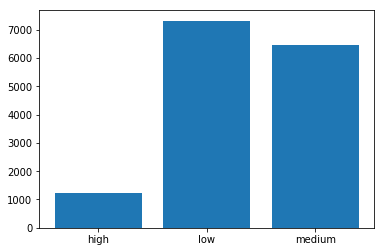

In [15]:
plt.bar(
    count_by_salary_df['salary'],
    count_by_salary_df['count']
)
plt.show()

### 8. Показать распределение сотрудников по зарплатам совместно с департаментами.

In [16]:
count_by_salary_sales_df = (
    df.groupby(['salary', 'sales'])
    .agg(count=('salary', 'count'))
    .reset_index()
    .sort_values(by=['sales', 'salary'])
)

count_by_salary_sales_df.head(10)

,salary,sales,count
0,high,IT,83
10,low,IT,609
20,medium,IT,535
1,high,RandD,51
11,low,RandD,364
21,medium,RandD,372
2,high,accounting,74
12,low,accounting,358
22,medium,accounting,335
3,high,hr,45


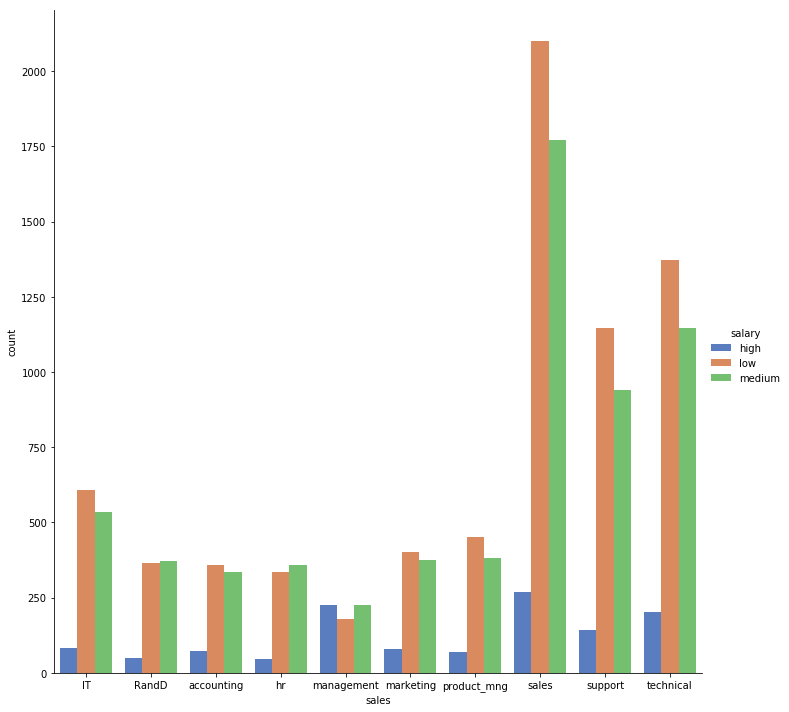

In [17]:
sns.catplot(
    x='sales',
    y='count',
    hue='salary',
    data=count_by_salary_sales_df,
    height=10,
    kind='bar',
    palette='muted'
)

plt.show()

### 9. Сколько сотрудников покинули компанию.

In [18]:
employes_left = len(df[df['left'] == 1])

print(f'Всего компанию покинуло {employes_left} сотрудников')

Всего компанию покинуло 3571 сотрудников


### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

#### Гипотеза: люди увольнялись в связи с загруженностью проектами

\# UPD

Для проверки этой гипотезы я разделю генеральную совокупность на две выборки по признаку `left == 1` и `left == 0`

In [30]:
# UPD
resigned_df = df[df['left'] == 1]
remained_df = df[df['left'] == 0]

In [31]:
# UPD
stats.ttest_1samp(
    resigned_df['number_project'],
    remained_df['number_project'].mean()
)

Ttest_1sampResult(statistic=2.2625169994483643, pvalue=0.023725330210266616)

\# UPD

Как видно из теста, pvalue меньше критически значимого значения, это значит что мы можем отвергать нулевую гипотезу.

Вывод: среднее кол-во проектов на каждом сотруднике могло повлиять на принятие решения об увольнении

#### Гипотеза: люди увольнялись из-за долгого отсутствия повышения

In [34]:
# UPD
stats.ttest_1samp(
    resigned_df['promotion_last_5years'],
    remained_df['promotion_last_5years'].mean()
)

Ttest_1sampResult(statistic=-17.190713188997574, pvalue=1.0688704028386881e-63)

Этот тест получился значительно проще, чем предыдущий и здесь сразу становится понятно, что нулевую гипотезу можно отвергнуть. Значит факт повышения за последние 5 лет действительно влияет на увольнение сотрудников. Постараюсь выяснить, как именно оно влияет на их решение ниже

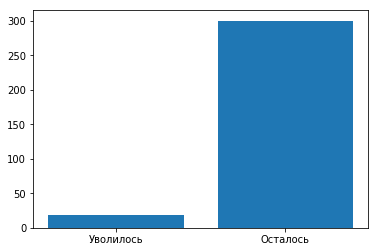

In [39]:
# UPD
g1_resigned_count = len(resigned_df[(resigned_df['promotion_last_5years'] == 1)])
g1_remained_count = len(remained_df[(remained_df['promotion_last_5years'] == 1)])

plt.bar(
    ['Уволилось', 'Осталось'],
    [g1_resigned_count, g1_remained_count]
)
plt.show()

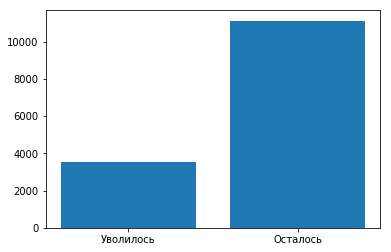

In [44]:
# UPD
g2_resigned_count = len(resigned_df[(resigned_df['promotion_last_5years'] == 0)])
g2_remained_count = len(remained_df[(remained_df['promotion_last_5years'] == 0)])

plt.bar(
    ['Уволилось', 'Осталось'],
    [g2_resigned_count, g2_remained_count]
)
plt.show()

Как видно из графиков, количество уволившихся людей, не получивших повышение за последние 5 лет работы действительно выше. Оно не преобладает над оставшимися работниками, но говорит о том, что повышение действительно положительно сказывается на решении сотрудника остаться в компании.

#### Гипотеза: люди увольнялись в связи инцидентами на работе

In [45]:
# UPD
stats.ttest_1samp(
    resigned_df['Work_accident'],
    remained_df['Work_accident'].mean()
)

Ttest_1sampResult(statistic=-35.92913587424606, pvalue=1.3683094373233962e-241)

Доверяя t-тесту можно отвергнуть нулевую гипотезу. А это значит - что наличие инцидентов на работе повлияло на решение сотрудника принять решение об уходе.

Здорово! У меня есть три проверенные гипотезы. Хотелось бы проверить больше различных предположений, но как это сделать, избавившись от рутины и копипаста одного и того же кода? Думаю, можно вернуться к нашей матрице коррелляции.

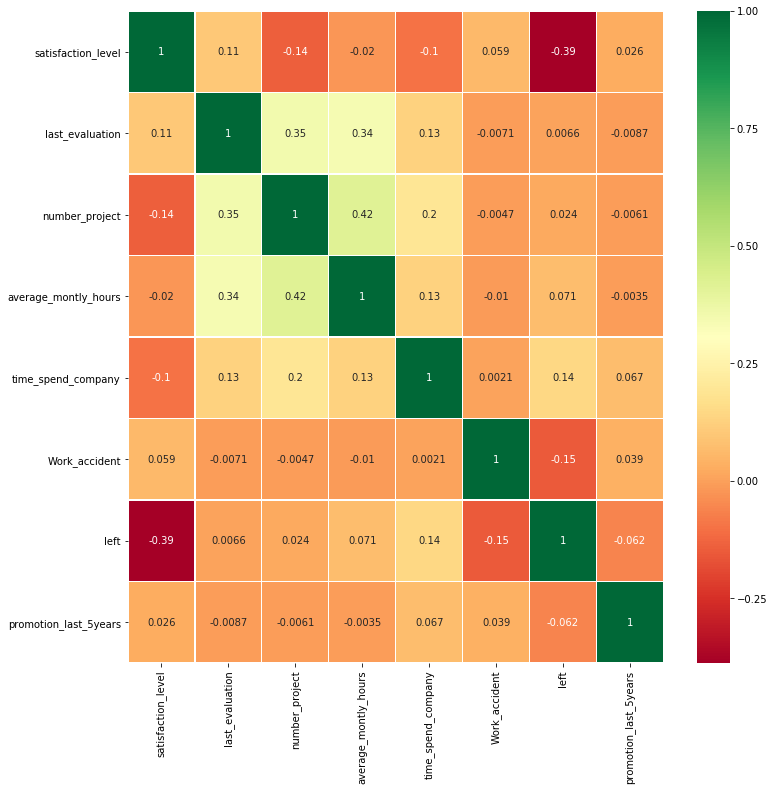

In [26]:
plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap='RdYlGn')
plt.show()

Поле `left` имеет высокую корреляцию с такими значениями как "удовлетворение от работы", "время, проведённое в компании", "наличие инцидентов". Опираясь на эти данные, можно предположить, что эти показатели так же сильно влияют на решение человека уйти из компании.

In [46]:
# UPD
stats.ttest_1samp(
    resigned_df['satisfaction_level'],
    remained_df['satisfaction_level'].mean()
)

Ttest_1sampResult(statistic=-51.33034867547431, pvalue=0.0)

In [48]:
# UPD
stats.ttest_1samp(
    resigned_df['time_spend_company'],
    remained_df['time_spend_company'].mean()
)

Ttest_1sampResult(statistic=30.344952648144773, pvalue=3.8135536324917118e-180)

**"Наличие инцидентов"** я проверял выше, поэтому последними гипотезами стала проверка зависимости от **"удовлетворености от работы"**, **"проведённого в компании времени"**. В обоих тестах pvalue близко к нулю, что означает, что мы можем отвергнуть нулевую гипотезу.

Ради "чистоты эксперемента" я проведу тест для поля с наименьшей корреляцией - **"last_evaluation"**

In [50]:
# UPD
stats.ttest_1samp(
    resigned_df['last_evaluation'],
    remained_df['last_evaluation'].mean()
)

Ttest_1sampResult(statistic=0.7978384275790602, pvalue=0.4250173228465538)

\# UPD
В этом заключительном тесте я вижу, что значение pvalue превышает критически значимую оценку и составляет аж 42%. Это значит, что нулевая гипотеза принята и поле **"last_evaluation"** не влияет на принятие решения об увольнении

### 11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

Если Вы читаете это, значит выгрузка на гитхаб мне удалась хе-хе =)